# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [3]:
# Method 1
import matplotlib.pyplot as plt
plt.plot(x,y,x,z, linewidth=3)

plt.show()

<Figure size 640x480 with 1 Axes>

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

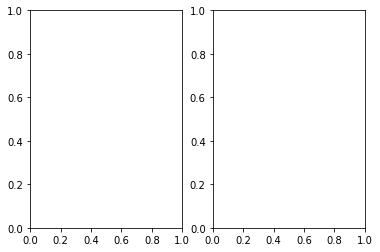

In [4]:
# Method 2
f, (a1, a2) = plt.subplots(nrows=1, ncols=2)
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

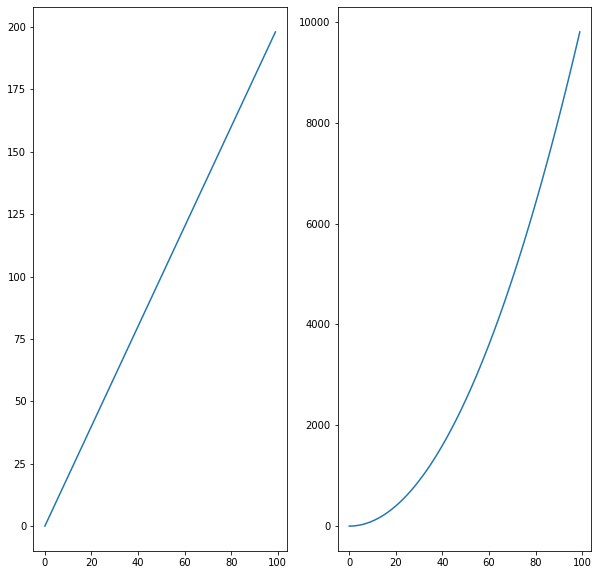

In [5]:
# your code here

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
plt.title = ''
'''
plt.sca - resizes the axis
plt.sca(axes[0])
plt.xticks(range(1,10))
plt.sca(axes[1])
plt.xticks(range(1,10))
'''
axes[0].plot(x,y)
#axes[0].set(range(0,500))
axes[1].plot(x,z)
#plt.sca(axes[0])
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

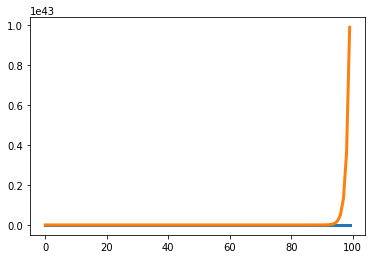

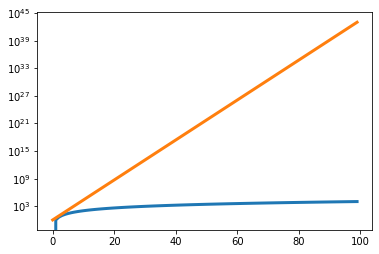

In [6]:
# your code here
plt.plot(x, np.square(x), x, np.exp(x), linewidth=3)
plt.yscale('linear')
plt.xscale('linear')
plt.show()

plt.plot(x, np.square(x), x, np.exp(x), linewidth=3)
plt.yscale('log')
plt.xscale('linear')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [7]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
import pandas as pd

fitbit = pd.read_csv('Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

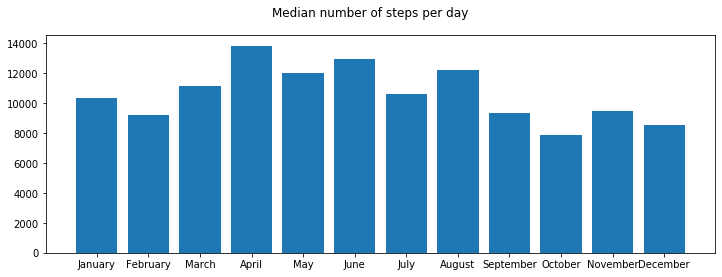

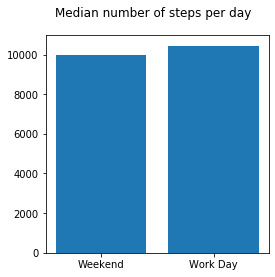

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
median_steps = fitbit.groupby('Months_encoded')['Steps'].median()

f = plt.figure(figsize=(12,4))
f.suptitle('Median number of steps per day')
plt.xticks(range(1,13),['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.bar(median_steps.index, median_steps.values)
plt.savefig('figures/plot1.jpg')
plt.show()



# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
median_steps_by_week_day = fitbit.groupby('Work_or_Weekend')['Steps'].median()

f = plt.figure(figsize=(4,4))
f.suptitle('Median number of steps per day')
plt.bar(median_steps_by_week_day.index, median_steps_by_week_day.values)
plt.xticks([0,1],['Weekend', 'Work Day'])
plt.savefig('figures/plot2.jpg')
plt.show()

# what does plt.sca() do?

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

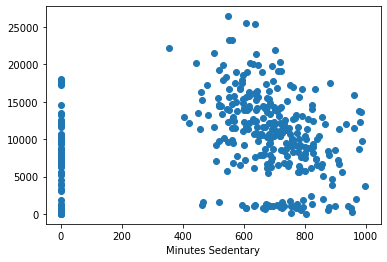

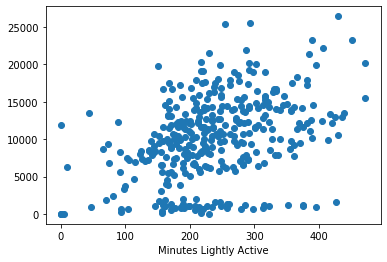

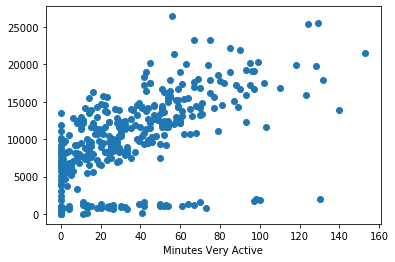

In [10]:
# your code here
cols = ['Minutes Sedentary','Minutes Lightly Active','Minutes Very Active']

for col in cols:
    plt.scatter(fitbit[col], fitbit['Steps'])
    plt.xlabel(col)
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
# your code here
import pandas as pd

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [12]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['int64','float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(exclude=['int64','float64']).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
# your code here
import seaborn as sns

plt.style.use('classic')

f = plt.figure(figsize=(12,6))


<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

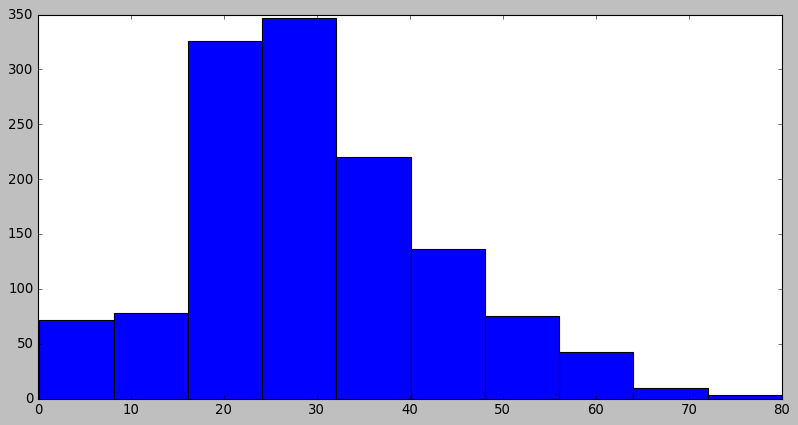

In [16]:
# your code here
plt.style.use('classic')

f = plt.figure(figsize=(12,6))

ax = plt.hist(titanic['Age'])
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

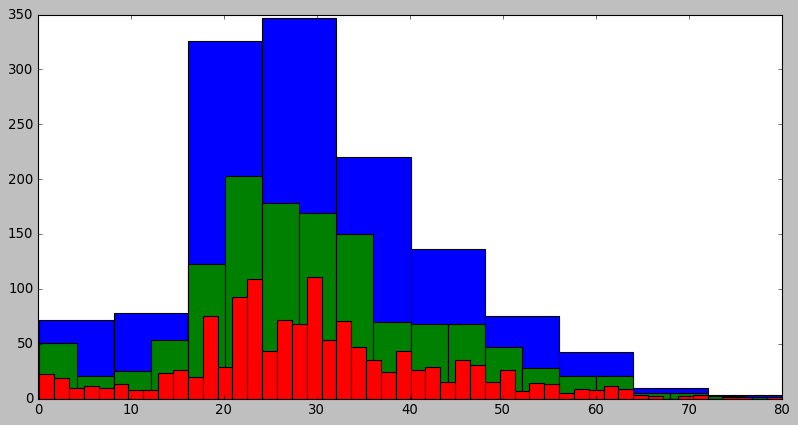

In [17]:
# your code here
plt.style.use('classic')
f = plt.figure(figsize=(12,6))

ax0 = plt.hist(titanic['Age'], bins=10)
ax1 = plt.hist(titanic['Age'], bins=20)
ax2 = plt.hist(titanic['Age'], bins=50)

plt.show()

#### How does the bin size affect your plot?

In [18]:
"""
The bin sizes affect the width of each bar.
The subplots with smaller bins get way lower frequencies values than the bigger ones.
"""

'\nThe bin sizes affect the width of each bar.\nThe subplots with smaller bins get way lower frequencies values than the bigger ones.\n'

#### Use seaborn to show the distribution of column `Age`.

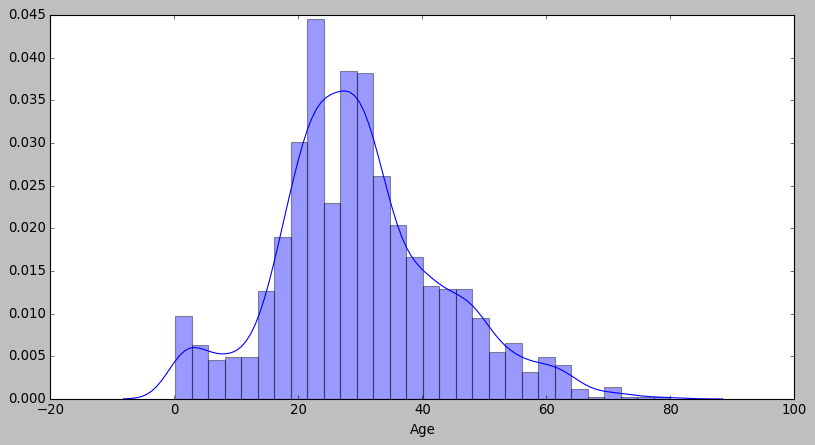

In [19]:
# your code here
# your code here
plt.style.use('classic')

f = plt.figure(figsize=(12,6))

ax = sns.distplot(titanic['Age'])
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

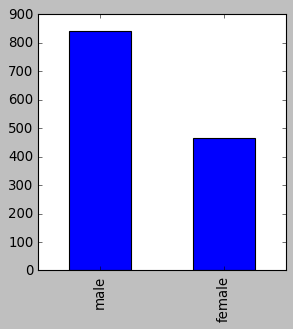

In [20]:
# Method 1 - matplotlib
# your code here
plt.style.use('classic')
f = plt.figure(figsize=(4,4))
titanic['Gender'].value_counts().plot(kind='bar')

plt.show()

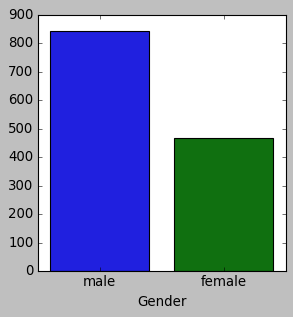

In [21]:
# Method 2 - seaborn
# your code here
plt.style.use('classic')
f = plt.figure(figsize=(4,4))
sns.barplot(x = 'Gender', y=titanic['Gender'].value_counts().values, data=titanic)

plt.show()

#### Use the right plot to visualize the column `Pclass`.

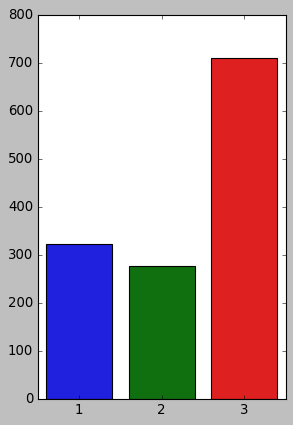

In [22]:
# your code here

plt.style.use('classic')
f = plt.figure(figsize=(4,6))

#print(titanic['Pclass'].value_counts())
#print(titanic['Pclass'].unique())

sns.barplot(x=titanic['Pclass'].unique(), y=titanic['Pclass'].value_counts().values, data=titanic)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64


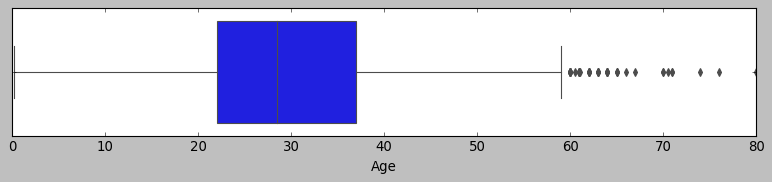

In [23]:
# your code here
print(titanic['Age'].describe())

plt.style.use('classic')
f = plt.figure(figsize=(12,2))

sns.boxplot(y='Age', data=titanic, orient='h')
plt.show()

In [24]:
"""
The boxplot graph shows the quartiles, maximum and the outliers in the data.
It's a good way to get an idea of the distribution of the data
"""

"\nThe boxplot graph shows the quartiles, maximum and the outliers in the data.\nIt's a good way to get an idea of the distribution of the data\n"

#### What does the last plot tell you about the feature `Age`?

In [25]:
"""
The average age is around 28 years (actually it's 28,5) 
and over half the population represented is within 10 years of the average.
Less than a quarter of the population are babies/children/teens.
And a bit less than a quarter are middle aged (40 to 60ish).
And there are a few older people as outliers.
"""

"\nThe average age is around 28 years (actually it's 28,5) \nand over half the population represented is within 10 years of the average.\nLess than a quarter of the population are babies/children/teens.\nAnd a bit less than a quarter are middle aged (40 to 60ish).\nAnd there are a few older people as outliers.\n"

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

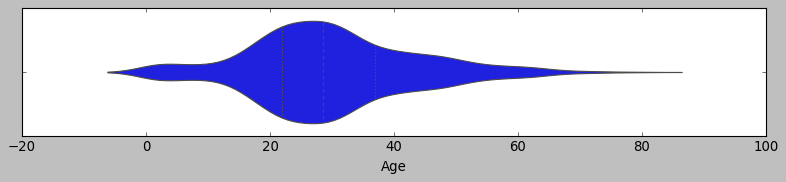

In [26]:
# your code here
plt.style.use('classic')

f = plt.figure(figsize=(12,2))

sns.violinplot(y='Age', data=titanic, orient='h', inner='quartile')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [27]:
"""
Most of the people in the first quartile are early twenties or late teens.
People in the third quartile are a bit more evenly distributed than the first, but are still skewed towards the mean.
"""

'\nMost of the people in the first quartile are early twenties or late teens.\nPeople in the third quartile are a bit more evenly distributed than the first, but are still skewed towards the mean.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

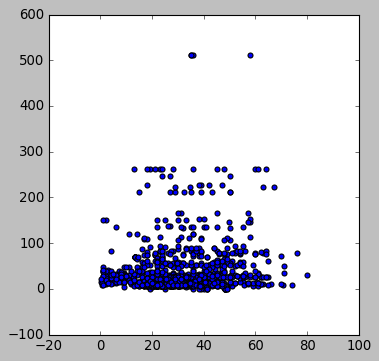

In [28]:
# Method 1 - matplotlib
# your code here
plt.style.use('classic')

f = plt.figure(figsize=(5,5))

plt.scatter(x='Age', y='Fare', data=titanic)
plt.show()

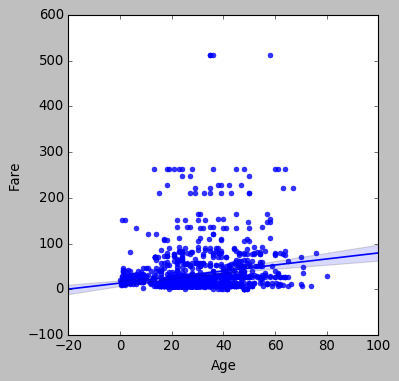

In [29]:
# Method 2 - seaborn
# your code here
plt.style.use('classic')

f = plt.figure(figsize=(5,5))

sns.regplot(x='Age', y='Fare', data=titanic)
plt.show()

#### Plot the correlation matrix using seaborn.

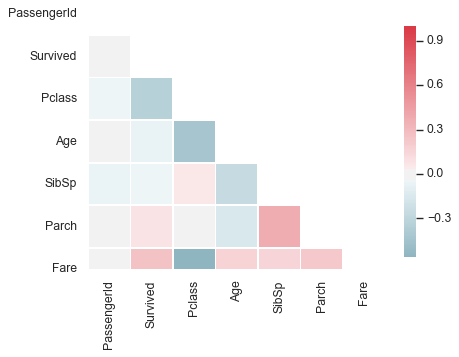

In [30]:
# your code here

# strongly based on https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style="white")

# Compute the correlation matrix
corr = titanic.corr()

# Generate a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f = plt.figure(figsize=(6,6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, center=0, linewidths=.5, cbar_kws={"shrink": .6})
    # square=True   -> make all cells square shaped
    # linewidths    -> size of the (white) grid lines
    # cbar_kws={"shrink": .5}     -> shrink the color scale to 0.6 of the original size

#### What are the most correlated features?

In [31]:
"""
Parch and SibSp
"""

'\nParch and SibSp\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

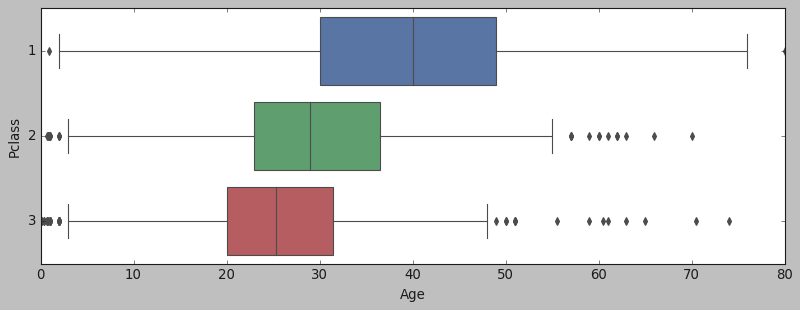

In [32]:
# your code here
plt.style.use('classic')

#sns.set_style('whitegrid')

f = plt.figure(figsize=(12,4))

sns.boxplot(x='Age', y='Pclass', data=titanic, orient='h')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

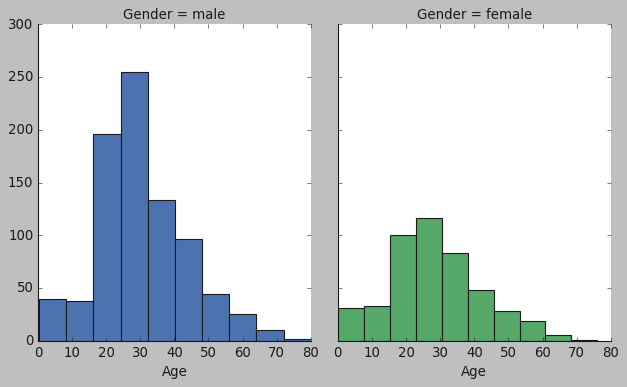

In [33]:
# your code here
plt.style.use('classic')

# Create a 'table' of graphs with the specified number of rows and cols
# And group the values by the columns specified
g = sns.FacetGrid(col='Gender', hue='Gender', data=titanic, height=5, aspect=0.8)
    # col   -> how many columns to display (based on unique values of df column)
    # row   -> sames as col, but with rows
    # aspect   -> the width is equal to: height * aspect

# map ('apply') a graph to the empty graphs created before (a histogram of age for each col ('Gender') in this case)
g = g.map(plt.hist, 'Age')

plt.show()